In [1]:
import pandas as pd
import numpy as np


Load the Dataset

In [2]:
data =  pd.read_csv('50_Startups.csv')

In [3]:
data.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.tail()

,R_D_spent,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_spent        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Data Cleaning

In [8]:
data.isnull().sum()

R_D_spent          0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

Outlier Treatments

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

<Axes: ylabel='R_D_spent'>

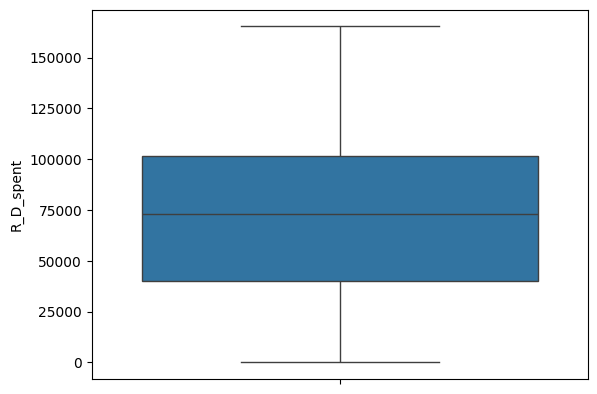

In [11]:
sns.boxplot(data["R_D_spent"])

<Axes: ylabel='Administration'>

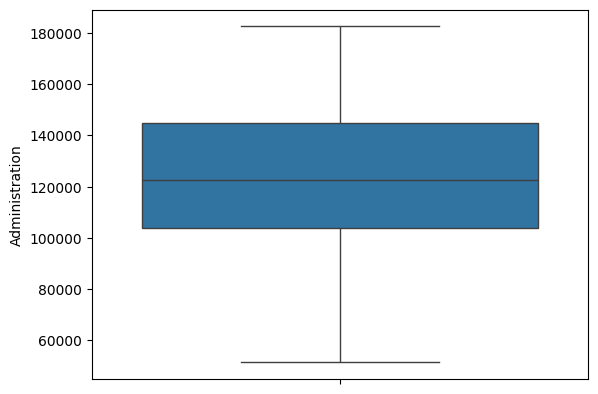

In [12]:
sns.boxplot(data["Administration"])

<Axes: ylabel='Marketing_Spend'>

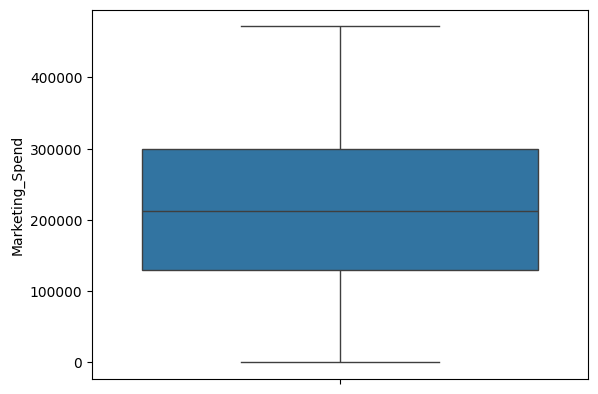

In [13]:
sns.boxplot(data['Marketing_Spend'])

4. Exploratory Data Analysis (EDA)

<Axes: xlabel='Marketing_Spend', ylabel='Count'>

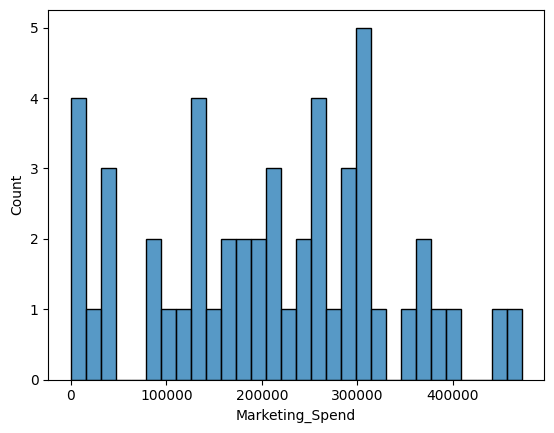

In [14]:
sns.histplot(data=data,x='Marketing_Spend',bins=30)

<Axes: xlabel='Profit', ylabel='Count'>

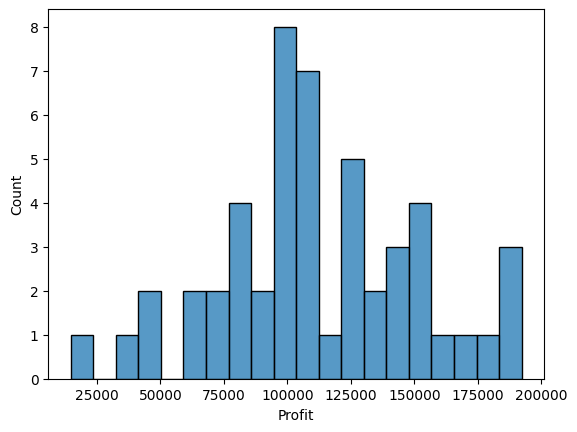

In [15]:
sns.histplot(data=data,x='Profit',bins=20)

<Axes: xlabel='R_D_spent', ylabel='Count'>

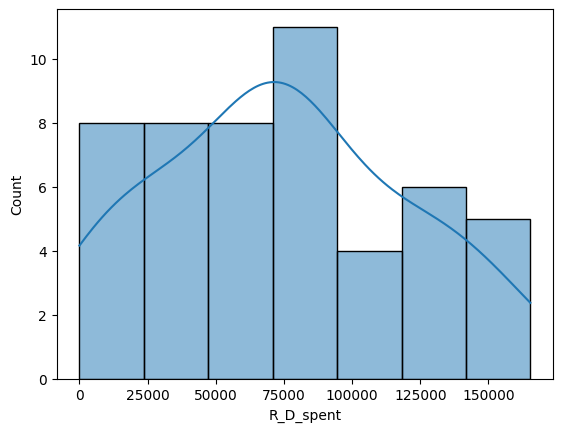

In [16]:
sns.histplot(data=data,x = 'R_D_spent',kde=True)

<Axes: xlabel='State', ylabel='count'>

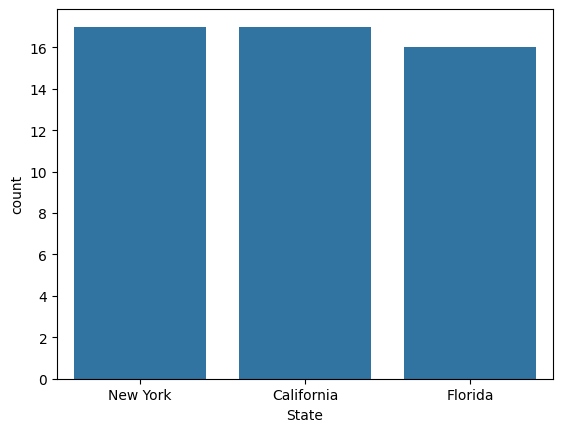

In [17]:
sns.countplot(data=data,x='State')

In [18]:
numerical_cols_pairs = [('R_D_spent', 'Profit'), ('Marketing_Spend', 'Profit'), ('Administration', 'Profit')]

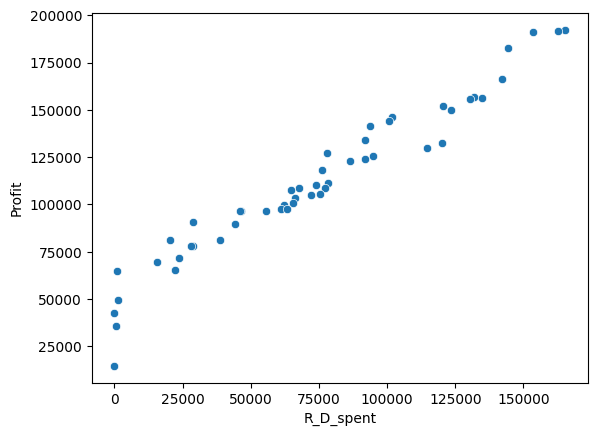

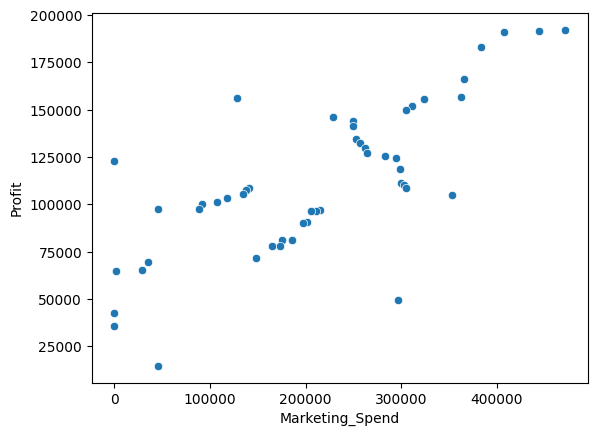

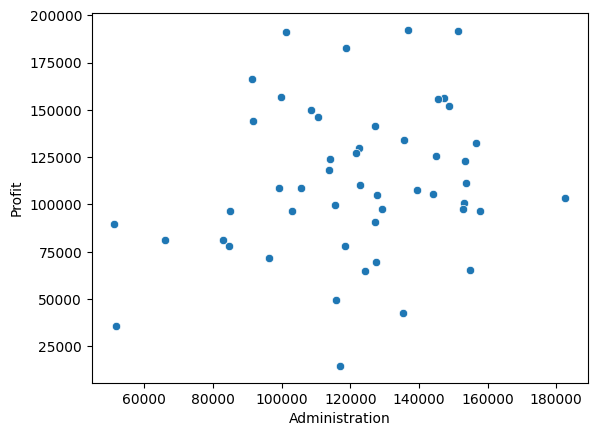

In [19]:
for col1,col2 in numerical_cols_pairs:
    sns.scatterplot(data=data,x=col1,y=col2)
    plt.show()

In [20]:
categorial_set = [('State','Marketing_Spend'),('State','Administration')]

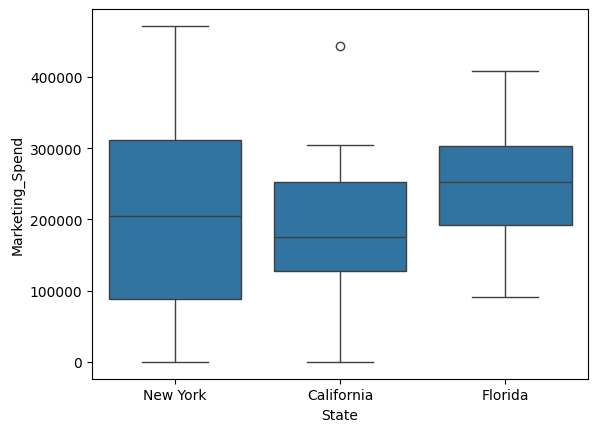

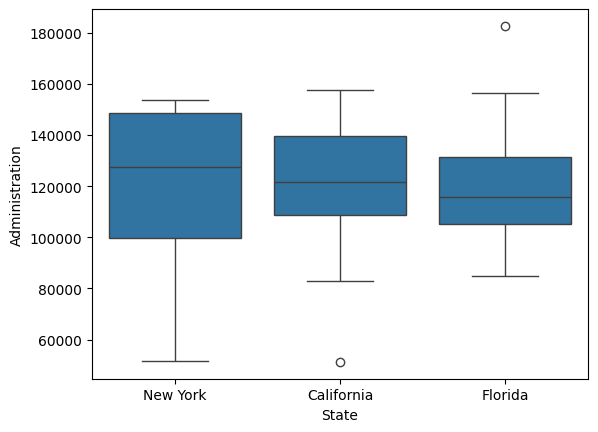

In [21]:
for col1, col2 in categorial_set:
    sns.boxplot(data=data,x=col1,y=col2)
    plt.show()

<Axes: xlabel='State', ylabel='R_D_spent'>

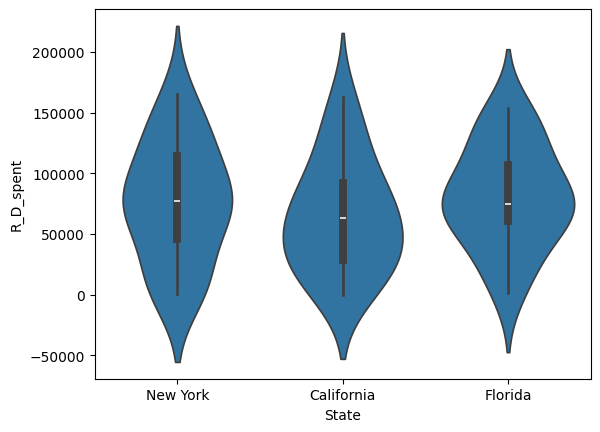

In [22]:
sns.violinplot(data=data,x='State',y='R_D_spent')

<Axes: xlabel='State', ylabel='Administration'>

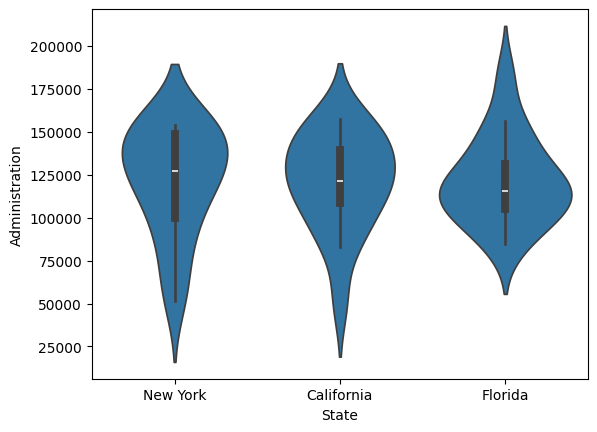

In [23]:
sns.violinplot(data=data,x='State',y='Administration')

5. Model Building

In [24]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data['State'] = labelencoder.fit_transform(data['State'])

In [25]:
data.head()

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [26]:
corr_data = data.corr()

<Axes: >

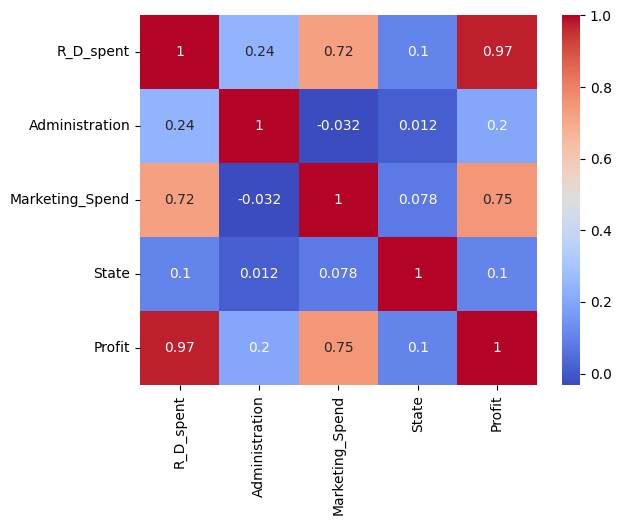

In [27]:
sns.heatmap(corr_data , annot=True,cmap='coolwarm')

Data Train and Test Split

In [29]:
x = data.drop("Profit",axis = 1)
y = data[['Profit']]

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
x_train.head()

,R_D_spent,Administration,Marketing_Spend,State
8,120542.52,148718.95,311613.29,2
3,144372.41,118671.85,383199.62,2
6,134615.46,147198.87,127716.82,0
41,27892.92,84710.77,164470.71,1
46,1315.46,115816.21,297114.46,1


In [33]:
x_test.head()

,R_D_spent,Administration,Marketing_Spend,State
13,91992.39,135495.07,252664.93,0
39,38558.51,82982.09,174999.30,0
30,61994.48,115641.28,91131.24,1
45,1000.23,124153.04,1903.93,2
17,94657.16,145077.58,282574.31,2


In [34]:
y_train.head()

,Profit
8,152211.77
3,182901.99
6,156122.51
41,77798.83
46,49490.75


In [35]:
y_test.head()

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


In [36]:
from sklearn.linear_model import LinearRegression


In [37]:
linear = LinearRegression()

In [38]:
ltrain=linear.fit(x_train,y_train)

In [39]:
y_pred = ltrain.predict(x_test)

In [40]:
y_pred

array([[126620.49493921],
       [ 85683.54596711],
       [ 98984.61503293],
       [ 45931.25925851],
       [128475.2702596 ],
       [ 51982.19430756],
       [108543.94735642],
       [100621.09758694],
       [ 97715.38523816],
       [112397.51790315],
       [128600.0448138 ],
       [174434.12518968],
       [ 93656.90339019]])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)

In [42]:
print(r2)

0.9190953762348169


In [70]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error (RMSE):", rmse)

Mean Squared Error: 86953191.30028795
Root Mean Square Error (RMSE): 9324.869505804783


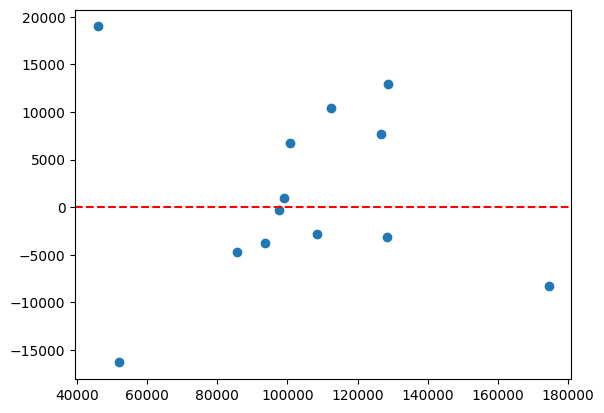

In [72]:
plt.scatter(y_pred,y_test-y_pred)
plt.axhline(y=0,color ='r',linestyle='--')


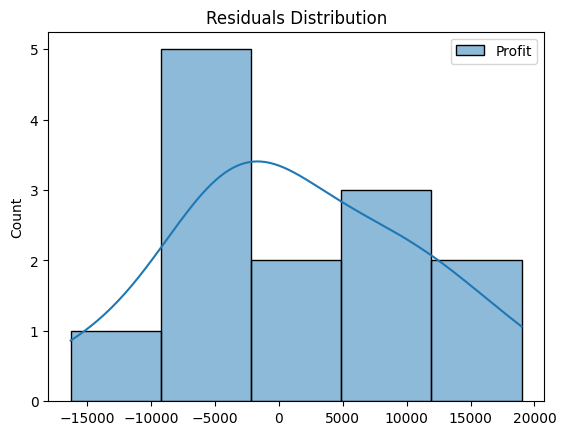

In [74]:
sns.histplot(y_test - y_pred, kde=True)
plt.title("Residuals Distribution")
plt.show()

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [79]:
import statsmodels.api as sm

In [80]:
X_with_const = sm.add_constant(x)

In [81]:
X_with_const

,const,R_D_spent,Administration,Marketing_Spend,State
0,1.0,165349.20,136897.80,471784.10,2
1,1.0,162597.70,151377.59,443898.53,0
2,1.0,153441.51,101145.55,407934.54,1
3,1.0,144372.41,118671.85,383199.62,2
4,1.0,142107.34,91391.77,366168.42,1
5,1.0,131876.90,99814.71,362861.36,2
6,1.0,134615.46,147198.87,127716.82,0
7,1.0,130298.13,145530.06,323876.68,1
8,1.0,120542.52,148718.95,311613.29,2
9,1.0,123334.88,108679.17,304981.62,0


In [86]:
X_with_const.shape

(50, 5)

In [82]:
vif = pd.DataFrame()

In [83]:
vif

""


In [84]:
vif['Features'] = x.columns

In [85]:
vif

,Features
0,R_D_spent
1,Administration
2,Marketing_Spend
3,State


In [98]:
vif_values = []


In [101]:
for i in range(1, X_with_const.shape[1]):
    vif_values.append(variance_inflation_factor(X_with_const.values, i))

In [102]:
vif['VIF'] = vif_values

print(vif)

          Features       VIF
0        R_D_spent  2.481178
1   Administration  1.175315
2  Marketing_Spend  2.326780
3            State  1.011281
